# 1

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
train_df = pd.read_csv('sign_mnist_train.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
test_df = pd.read_csv('sign_mnist_test.csv')
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


C:\Users\lskel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


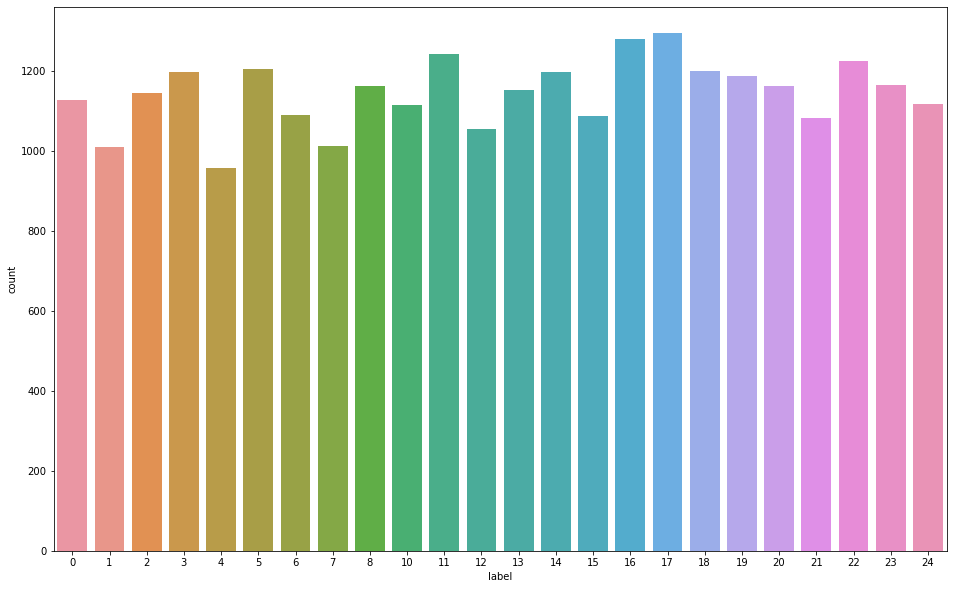

In [4]:
plt.figure(figsize=(16, 10))
sns.countplot(train_df['label'])
plt.show()


In [5]:
train_df = train_df.astype(np.float32)
x_train = train_df.drop(columns=['label'], axis=1).values
x_train = x_train.reshape((-1, 28, 28, 1))
y_train = train_df[['label']].values

test_df = test_df.astype(np.float32)
x_test = test_df.drop(columns=['label'], axis=1).values
x_test = x_test.reshape((-1, 28, 28, 1))
y_test = test_df[['label']].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(27455, 28, 28, 1) (27455, 1)
(7172, 28, 28, 1) (7172, 1)


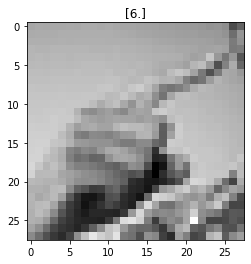

In [6]:
index = 1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28, 28)), cmap='gray')
plt.show()

In [7]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

print(y_train.shape)

(27455, 24)


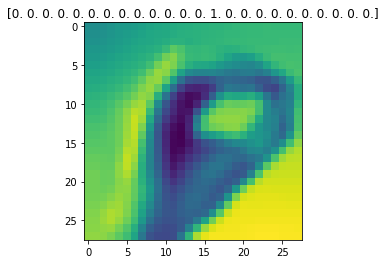

In [8]:
train_image_datagen = ImageDataGenerator( 
  rescale=1./255, # Standardization
  rotation_range=10,  # Randomly select pictures and rotate them 0-10 degree)
  zoom_range=0.1, # Randomly select pictures and amplify the size of them up to 10%
  width_shift_range=0.1,  # Randomly select pictures and make them horizontal shift 10%
  height_shift_range=0.1,  # Randomly select pictures and make them vertical shift 10%
)

train_datagen = train_image_datagen.flow(
    x=x_train,
    y=y_train,
    batch_size=256,
    shuffle=True
)

test_image_datagen = ImageDataGenerator( # for test data, we do not need to make augmentation
  rescale=1./255
)

test_datagen = test_image_datagen.flow(
    x=x_test,
    y=y_test,
    batch_size=256,
    shuffle=False
)

index = 1

preview_img = train_datagen.__getitem__(0)[0][index]
preview_label = train_datagen.__getitem__(0)[1][index]

plt.imshow(preview_img.reshape((28, 28)))
plt.title(str(preview_label))
plt.show()

In [9]:
input = Input(shape=(28, 28, 1))

hidden = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Flatten()(hidden)

hidden = Dense(512, activation='relu')(hidden)

hidden = Dropout(rate=0.3)(hidden)

output = Dense(24, activation='softmax')(hidden)

model = Model(inputs=input, outputs=output)

model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0     

In [10]:
#1a
input = Input(shape=(28, 28, 1))

hidden = Conv2D(filters=128, kernel_size=3, strides=1, padding='valid', activation='relu')(input)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden) # make the dimension a half.

hidden = Conv2D(filters=128, kernel_size=3, strides=1, padding='valid', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Conv2D(filters=128, kernel_size=3, strides=1, padding='valid', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)

hidden = Flatten()(hidden) # to compute for dense, we can make 2 dimension to 1 dimension

hidden = Dense(512, activation='relu')(hidden)

hidden = Dropout(rate=0.3)(hidden) # 30% node randomly select

output = Dense(24, activation='softmax')(hidden)

updated_model = Model(inputs=input, outputs=output)

updated_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

updated_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0   

In [11]:
#1b
input = Input(shape=(28, 28, 1))

hidden = Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', activation='relu')(input)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden) # make the dimension a half.
hidden = Dropout(rate=0.5)(hidden) 

hidden = Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', activation='relu')(hidden)
hidden = MaxPooling2D(pool_size=2, strides=2)(hidden)
hidden = Dropout(rate=0.5)(hidden) 

hidden = Flatten()(hidden) # to compute for dense, we can make 2 dimension to 1 dimension

output = Dense(24, activation='sigmoid')(hidden)

updated_model1 = Model(inputs=input, outputs=output)

updated_model1.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

updated_model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0   

In [12]:
history = model.fit(
    train_datagen,
    validation_data=test_datagen, 
    epochs=20 
)

Epoch 1/20
108/108 [==============================] - 8s 36ms/step - loss: 0.2099 - accuracy: 0.0429 - val_loss: 0.1756 - val_accuracy: 0.0347
Epoch 2/20
108/108 [==============================] - 4s 34ms/step - loss: 0.1745 - accuracy: 0.0613 - val_loss: 0.1608 - val_accuracy: 0.1358
Epoch 3/20
108/108 [==============================] - 4s 34ms/step - loss: 0.1322 - accuracy: 0.3201 - val_loss: 0.0840 - val_accuracy: 0.6238
Epoch 4/20
108/108 [==============================] - 4s 34ms/step - loss: 0.0860 - accuracy: 0.6010 - val_loss: 0.0519 - val_accuracy: 0.7921
Epoch 5/20
108/108 [==============================] - 4s 34ms/step - loss: 0.0635 - accuracy: 0.7263 - val_loss: 0.0371 - val_accuracy: 0.8847
Epoch 6/20
108/108 [==============================] - 4s 34ms/step - loss: 0.0504 - accuracy: 0.7948 - val_loss: 0.0288 - val_accuracy: 0.9037
Epoch 7/20
108/108 [==============================] - 4s 34ms/step - loss: 0.0413 - accuracy: 0.8418 - val_loss: 0.0254 - val_accuracy: 0.9095

In [13]:
updated_history = updated_model.fit(
    train_datagen,
    validation_data=test_datagen, 
    epochs=20 
)

Epoch 1/20
108/108 [==============================] - 4s 35ms/step - loss: 0.2090 - accuracy: 0.0440 - val_loss: 0.1750 - val_accuracy: 0.0487
Epoch 2/20
108/108 [==============================] - 4s 34ms/step - loss: 0.1636 - accuracy: 0.1201 - val_loss: 0.1377 - val_accuracy: 0.2648
Epoch 3/20
108/108 [==============================] - 4s 34ms/step - loss: 0.1286 - accuracy: 0.3232 - val_loss: 0.0973 - val_accuracy: 0.5323
Epoch 4/20
108/108 [==============================] - 4s 34ms/step - loss: 0.1007 - accuracy: 0.4926 - val_loss: 0.0766 - val_accuracy: 0.6201
Epoch 5/20
108/108 [==============================] - 4s 35ms/step - loss: 0.0834 - accuracy: 0.5931 - val_loss: 0.0597 - val_accuracy: 0.7223
Epoch 6/20
108/108 [==============================] - 4s 34ms/step - loss: 0.0697 - accuracy: 0.6758 - val_loss: 0.0555 - val_accuracy: 0.7372
Epoch 7/20
108/108 [==============================] - 4s 34ms/step - loss: 0.0596 - accuracy: 0.7309 - val_loss: 0.0422 - val_accuracy: 0.8052

In [14]:
updated_history1 = updated_model1.fit(
    train_datagen,
    validation_data=test_datagen, 
    epochs=20 
)

Epoch 1/20
108/108 [==============================] - 4s 35ms/step - loss: 0.1994 - accuracy: 0.0487 - val_loss: 0.1877 - val_accuracy: 0.1235
Epoch 2/20
108/108 [==============================] - 4s 34ms/step - loss: 0.1563 - accuracy: 0.1803 - val_loss: 0.1416 - val_accuracy: 0.3911
Epoch 3/20
108/108 [==============================] - 4s 34ms/step - loss: 0.1353 - accuracy: 0.3229 - val_loss: 0.1118 - val_accuracy: 0.5940
Epoch 4/20
108/108 [==============================] - 4s 34ms/step - loss: 0.1209 - accuracy: 0.4243 - val_loss: 0.0934 - val_accuracy: 0.6690
Epoch 5/20
108/108 [==============================] - 4s 34ms/step - loss: 0.1053 - accuracy: 0.5237 - val_loss: 0.0746 - val_accuracy: 0.7678
Epoch 6/20
108/108 [==============================] - 4s 34ms/step - loss: 0.0925 - accuracy: 0.6034 - val_loss: 0.0651 - val_accuracy: 0.8061
Epoch 7/20
108/108 [==============================] - 4s 34ms/step - loss: 0.0822 - accuracy: 0.6586 - val_loss: 0.0543 - val_accuracy: 0.8607

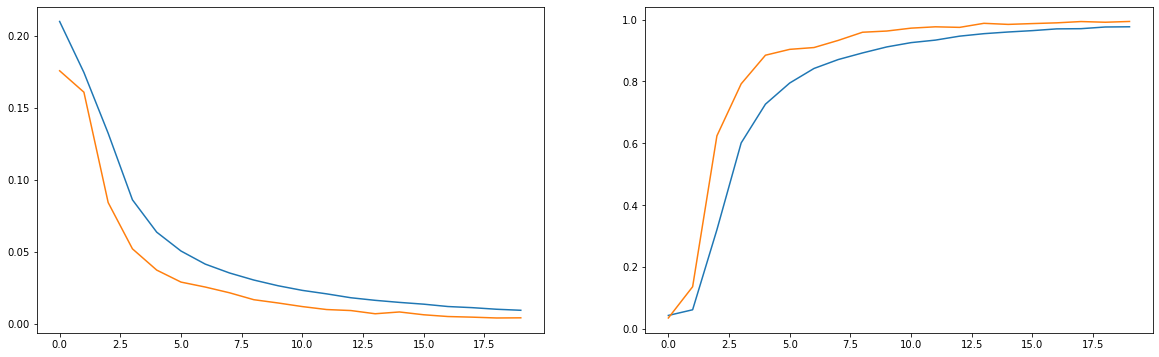

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])

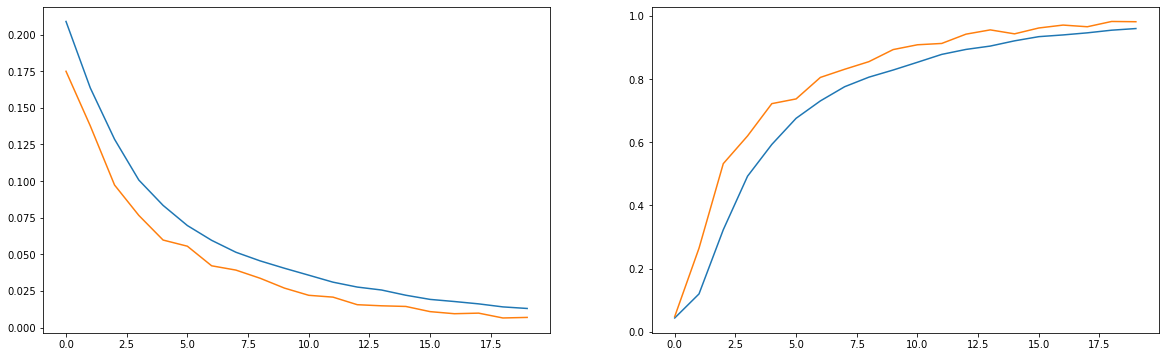

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(updated_history.history['loss'])
axes[0].plot(updated_history.history['val_loss'])
axes[1].plot(updated_history.history['accuracy'])
axes[1].plot(updated_history.history['val_accuracy'])

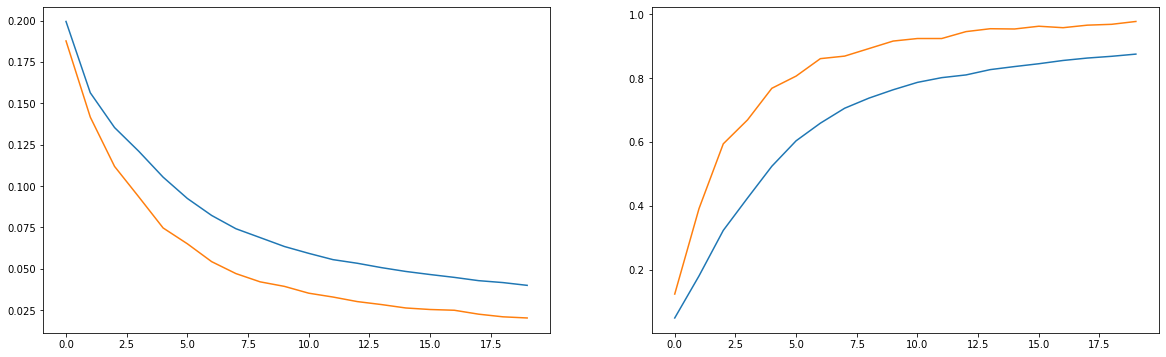

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(updated_history1.history['loss'])
axes[0].plot(updated_history1.history['val_loss'])
axes[1].plot(updated_history1.history['accuracy'])
axes[1].plot(updated_history1.history['val_accuracy'])

# Compared to the original CNN model, when you adjust the convolution layers by increasing the filters to 128 for all Conv2D layer, the distance between the 2 graphs decreased compared to the original model. I adjusted the NN layers by removing one Conv2D layer and changed the output layer to sigmoid. The distance between the 2 graphs were close in the beginning and increased towards the end of the graph.

# 2

In [18]:
from tensorflow.keras.applications import ResNet50 

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(
  rescale=1./255, 
  rotation_range=10, # possible to rotate upto 180 degree
  zoom_range=0.1, 
  width_shift_range=0.1,  
  height_shift_range=0.1,  
  horizontal_flip=True 
)

test_datagen = ImageDataGenerator(
  rescale=1./255 
)

train_gen = train_datagen.flow_from_directory(
  './seg_train',
  target_size=(224, 224), # (height, width)
  batch_size=32,
  seed=2021,
  class_mode='categorical',
  shuffle=True
)

test_gen = test_datagen.flow_from_directory(
  './seg_test',
  target_size=(224, 224), # (height, width)
  batch_size=32,
  seed=2021,
  class_mode='categorical',
  shuffle=False
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [21]:
from pprint import pprint
pprint(train_gen.class_indices)

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}


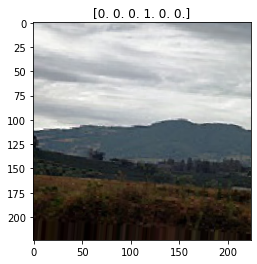

In [22]:
preview_batch = train_gen.__getitem__(0)

preview_imgs, preview_labels = preview_batch

plt.title(str(preview_labels[0]))
plt.imshow(preview_imgs[0])

In [23]:
input = Input(shape=(224, 224, 3))
#weights는 imagenet model, include_top is about the feature of models such as dropout 
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input, pooling='max')

x = base_model.output
x = Dropout(rate=0.25)(x)
x = Dense(256, activation='relu')(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

C:\Users\lskel\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint
# This will enable to save your model. 끔 .. val_acc -가장 높은 accuracy만 .. 4시간 걸린다 
history = model.fit(
    train_gen,
    validation_data=test_gen, 
    epochs=20, # Try >20. It takes several hours. 
    callbacks=[ # This model will be saved as model.h5 and select the best accuracy rate for val_acc. 
      ModelCheckpoint('model.h5', monitor='val_acc', verbose=1, save_best_only=True)
    ]
)

Epoch 1/20
439/439 [==============================] - 107s 235ms/step - loss: 1.2189 - acc: 0.7241 - val_loss: 1.8211 - val_acc: 0.1697

Epoch 00001: val_acc improved from -inf to 0.16967, saving model to model.h5


C:\Users\lskel\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
439/439 [==============================] - 103s 234ms/step - loss: 0.4968 - acc: 0.8348 - val_loss: 0.5676 - val_acc: 0.7957

Epoch 00002: val_acc improved from 0.16967 to 0.79567, saving model to model.h5
Epoch 3/20
439/439 [==============================] - 101s 230ms/step - loss: 0.4256 - acc: 0.8524 - val_loss: 1.7236 - val_acc: 0.6933

Epoch 00003: val_acc did not improve from 0.79567
Epoch 4/20
439/439 [==============================] - 101s 230ms/step - loss: 0.4108 - acc: 0.8619 - val_loss: 0.5428 - val_acc: 0.8133

Epoch 00004: val_acc improved from 0.79567 to 0.81333, saving model to model.h5
Epoch 5/20
439/439 [==============================] - 102s 232ms/step - loss: 0.4480 - acc: 0.8473 - val_loss: 0.5732 - val_acc: 0.7990

Epoch 00005: val_acc did not improve from 0.81333
Epoch 6/20
439/439 [==============================] - 102s 232ms/step - loss: 0.4505 - acc: 0.8528 - val_loss: 0.6091 - val_acc: 0.7753

Epoch 00006: val_acc did not improve from 0.81333
Epoch

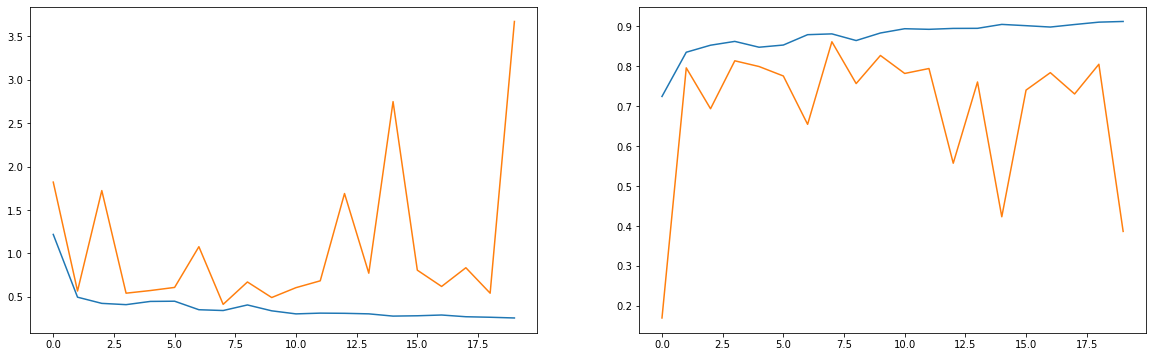

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[1].plot(history.history['acc'])
axes[1].plot(history.history['val_acc'])